<a href="https://colab.research.google.com/github/miftahudinfaiz/BDDM/blob/main/BD%26DM_week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK 13 - CLUSTERING EVALUATION

Evaluasi clustering digunakan untuk mengetahui seberapa baik suatu data terkelompokkan.
Ada 2 pendekatan Evaluasi Clustering
1.	Evaluasi Internal
2.	Eksternal
  
  **Evaluasi Internal** Evaluasi internal dilakukan hanya menggunakan informasi apa adanya dari dataset. Score terbaik diberikan untuk model jika ada kesamaan yang tinggi dalam cluster dan kesamaan yang rendah antar-cluster

Contoh Metric yang dapat digunakan dalam evaluasi internal:
*	Davies-Bouldin Index
*	Silhouette Index
*	Dunn Index
*	Calinski-Harabasz Index

**Evaluasi Eksternal** Berorientasi klasifikasi dan berorientasi kemiripan

Contoh Metric yang dapat digunakan untuk evaluasi Eksternal:
*	Rand Index
*	Homogeneity   Completeness
*	V-measure
*	Normalized Mutual Information
*	Purity
*	Adjusted Rand Index

**Davies Bouldin Index (DBI)**

Ada empat tahapan dalam menghitung DBI diantaranya yaitu:

1. Menghitung Sum Of Square Within Cluster (SSW) ialah keterikatan anggota satu cluster atau seberapa mirip antara anggota satu dan dua dan semakin kecil semakin bagus dikarenakan semakin mirip.
2.	Menghitung Sum Of Square between cluster (SBB) merupakan jarak antar cluster cukup besar sehingga terpisah ke dalam kelompok lain. SSB bertujuan untuk mengetahui separasi/heterogenitas. Separasi merupakan perbedaan antara satu cluster dengan cluster lainnya.
3.	Menghitung Rasio berfungsi untuk dapat mengetahui seberapa bagus nilai perbandingan cluster satu dengan cluster lainnya. Jumlah kohesi harus kecil sedangkan jumlah separasi harus lebih besar
4.	Menghitung DBI (Davis Bouldin Index)

Indeks yang lebih rendah menunjukkan bahwa kluster lebih padat dan lebih berbeda satu sama lain, sementara indeks yang lebih tinggi menunjukkan bahwa kluster kurang padat dan kurang berbeda satu sama lain.


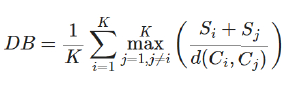

**Silhouette Score**

Tahapan perhitungan 

1. Hitung rata-rata jarak objek dengan semua objek lain yang berada di dalam satu cluster
2.	Hitung rata-rata jarak objek dengan semua objek lain yang berada pada cluster lain, kemudian ambil nilai paling minimum
3.	Hitung nilai silhouette coefficient

Nilai hasil silhouette coefficient terletak pada kisaran nilai -1 hingga 1. Semakin nilai silhouette coefficient mendekati nilai 1, maka semakin baik pengelompokan data dalam satu cluster. Sebaliknya jika silhouette coefficient mendekati nilai -1 , maka semakin buruk pengelompokan data didalam satu cluster.


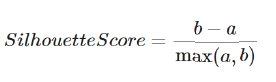

**Rand Index**

Rand Index dihitung dengan mengukur persentase prediksi yang benar di antara semua prediksi. sehingga disini perlu data label hasil cluster yang diharapkan. Metric diitung berdasarkan tolak ukur klasifikasi. Rand Index berkisar antara 0 dan 1. index yang baik ditunjukkan dengan nilai 1.

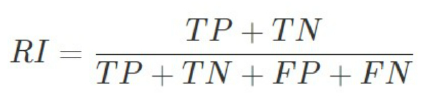

**Purity**

Purity (external evaluation technique) evaluates the extent to which a cluster belongs to a class. It involves assigning a cluster to a class that is the most frequent in the cluster and then counting the number of correctly assigned data points per cluster, taking the sum over all clusters, and dividing the value by the total number of data points


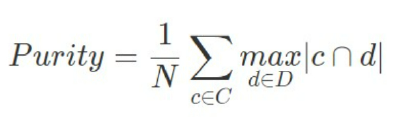

A purity of 1 indicates good clustering and purity of 0 indicates bad clustering. The higher the number of clusters, the easier it is to have a high purity value (consider the case when every data point is in its own cluster; it gives a purity of 1

**V-Measure**

The 'V' stands for "validity", a common term used to describe the goodness of a clustering solution. V-measure is an entropy-based measure which explicitly measures how successfully the criteria of homogeneity and completeness have been satisfied


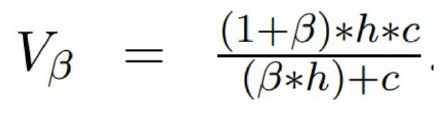

**Homogeneity:**

In order to satisfy our homogeneity criteria, a clustering must assign only those datapoints that are members of a single class to a single cluster.

**Completeness:**

Completeness is symmetrical to homogeneity. In order to satisfy the completeness criteria, a clustering must assign all of those datapoints that are members of a single class to a single cluster


##Implementasi 1 - Spectral Data

###1. Import Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

###2. Generate Data

In [ ]:
#make_circles dapat digunakan untuk menghasilkan data dalam bentuk circle
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

###3. EDA


In [ ]:
#X adalah data yang membentuk circle
print(f"Nilai X: {X[:5]}\n")

#sedangkan y, adalah cluster dari data tersebut
print(f"Cluster: {y[:5]}\n")

Nilai X: [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]

Cluster: [0 1 1 1 1]



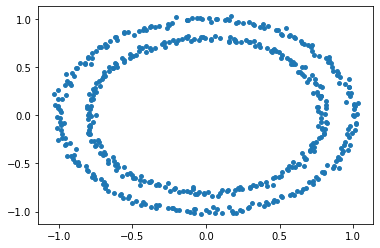

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

###4. Create Cluster

####KMEANS CLUSTER
Parameter KMeans di bawah dipilih secara acak (tidak menggunakan elbow method / silhouette score) yang nantinya akan dievaluasi hasilnya.

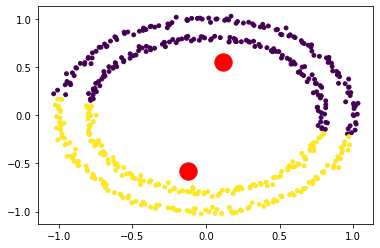

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], s=300, c="red")
plt.show()

####DBSCAN Cluster
Target dari clustering DBSCAN ini adalah dua cluster, dimana satu cluster adalah satu circle

#####Determine DBSCAN Hyperparameter

In [ ]:
"""
range untuk eps_values diperoleh dari beberapa percobaansetelah menerapkan NearestNeighbor.
sedangkan min_samples juga diperoleh dari beberapa percobaan
"""
#create eps and min_samples combination 
eps_values=np.arange(0.02, 0.3, 0.01)
min_samples = np.arange(2, 5)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = []
epsvalues = []
min_samp = []

#iterate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  #no of cluster must be > 1, so if cluster <= 1 then pass to next iteration
  if len(np.unique(dbscan_cluster.labels_)) <=1:
    break
  else:
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
#create a dataframe based on the iteration results
eps_min =list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns = ["no_of_clusters", "epsilon_values", "minimum_points"])
eps_min_df.head()

,no_of_clusters,epsilon_values,minimum_points
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3


In [ ]:
"""
karena tujuannya menghasilkan cluster 2 
maka dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df["no_of_clusters"]==2]

,no_of_clusters,epsilon_values,minimum_points
2,2,0.02,4
18,2,0.08,2
19,2,0.08,3
20,2,0.08,4
21,2,0.09,2
22,2,0.09,3
23,2,0.09,4
24,2,0.10,2
25,2,0.10,3
26,2,0.10,4


#####Create Cluster
Kali ini menggunakan nilai eps = 0.08 dan min_samples = 2, kedua parameter tersebut dipilih secara acak dari salah satu row eps_min_df yang menghasilkan cluster == 2

In [ ]:
dbscan_cluster = DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

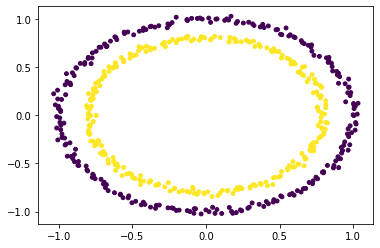

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15, c=dbscan_result)
plt.show()

###5. Cluster Evaluation
Internal Evaluation
Internal evaluation hanya menggunakan informasi apa adanya dari dataset. Score terbaik diberikan untuk model jika ada kesamaan yang tinggi dalam cluster dan kesamaan yang rendah antar-cluster


####Davies Bouldin Index (DBI)

In [ ]:
dbi_kmeans =davies_bouldin_score(X, kmeans_result)
dbi_dbscan =davies_bouldin_score(X, dbscan_result)

print(f"DBI kmeans Score: {dbi_kmeans}")
print(f"DBI dbscan Score: {dbi_dbscan}")

DBI kmeans Score: 1.1413660912854755
DBI dbscan Score: 690.8008186438688


####Silhouette Score

In [ ]:
sil_kmeans =silhouette_score(X, kmeans_result)
sil_dbscan =silhouette_score(X, dbscan_result)

print(f"Silhouette score kmeans Score: {sil_kmeans}")
print(f"Silhouette score dbscan Score: {sil_dbscan}")

Silhouette score kmeans Score: 0.4009108760935593
Silhouette score dbscan Score: 0.0183945519188842


####Rand Index

In [ ]:
#sklearn . metrics . rand_score(labels_true, labels_pred)
from sklearn.metrics import rand_score

rand_score_Kmeans=rand_score(y, kmeans_result)
rand_score_dbscan=rand_score(y, dbscan_result)
print(f'Rand Score of KMeans	: {rand_score_Kmeans}')
print(f'Rand Score of DBSCAN	: {rand_score_dbscan}')


Rand Score of KMeans	: 0.4990060120240481
Rand Score of DBSCAN	: 1.0


####Homogeneity_score

In [ ]:
from sklearn . metrics import homogeneity_score
homogeneity_score_kmeans = homogeneity_score(y, kmeans_result)
homogeneity_score_dbscan = homogeneity_score(y, dbscan_result)

print(f'homogeneity Score of KMeans {homogeneity_score_kmeans}')
print(f'homogeneity Score of DBSCAN : {homogeneity_score_dbscan}')

homogeneity Score of KMeans 1.154325335452816e-05
homogeneity Score of DBSCAN : 1.0


####Completeness Score

In [ ]:
from sklearn.metrics import completeness_score
completeness_score_kmeans = completeness_score(y, kmeans_result)
completeness_score_dbscan = completeness_score(y, dbscan_result)

print(f'completeness Score of KMeans {completeness_score_kmeans}')
print(f'completeness Score of DBSCAN {completeness_score_dbscan}')

completeness Score of KMeans 1.1544452552270064e-05
completeness Score of DBSCAN 1.0


####V-Measure Score

In [ ]:
from sklearn.metrics import v_measure_score
v_measure_score_kmeans = v_measure_score(y, kmeans_result)
v_measure_score_dbscan = v_measure_score (y, dbscan_result)

print(f'v measure Score of KMeans : {v_measure_score_kmeans}')
print(f'v measure Score of DBSCAN : {v_measure_score_dbscan}')

v measure Score of KMeans : 1.1543852922255368e-05
v measure Score of DBSCAN : 1.0


##Implementasi 2 - Spherical Data

###1. Import Library

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib. pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

###2. Generate Data

In [ ]:
#make_circles dapat digunakan untuk menghasilkan data 
X, y = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=0)

###3. EDA

In [ ]:
#menampilkan 5 data teratas
#X adalah data yang membentuk circle
print(f"Nilai X: {X[:5]}\n")

#sedangkan y, adalah cluster dari data tersebut
print(f"Cluster: {y[:5]}\n")

Nilai X: [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]

Cluster: [1 1 0 0 1]



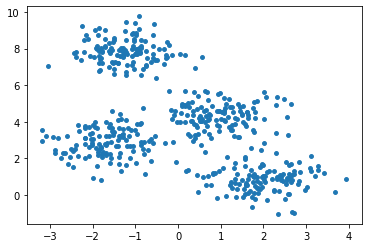

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

###4. Create Cluster

####KMeans Cluster

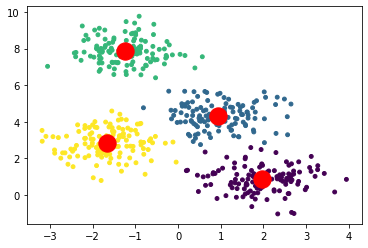

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], s=300, c="red")

plt.show()

####DBSCAN Cluster
Target dari clustering DBSCAN ini adalah empat cluster

#####Determine DBSCAN Hyperparameter

In [ ]:
#create eps and min_samples combination
eps_values=np.arange(0.1, 1.0, 0.1)
min_samples = np.arange(5, 10)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
#list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []

#iterate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  #no of cluster must be > 1, so if cluster <= 1 then pass
  if len(np.unique(dbscan_cluster.labels_)) <=1:
    break
  else:
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append vales to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
#create a dataframe based on the iterations results
eps_min =list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns = ["no_of_clusters", "epsilon_values", "minimum_points"])
eps_min_df.head()

,no_of_clusters,epsilon_values,minimum_points
0,6,0.1,5


In [ ]:
"""
karena tujuannya menghasilkan cluster 4,
maka dapat menggunakan salah satu -
dari beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df["no_of_clusters"]==4]

,no_of_clusters,epsilon_values,minimum_points


#####Create Cluster

Kali ini menggunakan nilai eps = 0.5 dan min_samples = 6

In [ ]:
dbscan_cluster = DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_

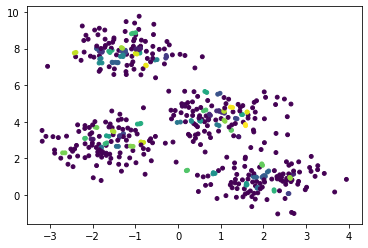

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15, c=dbscan_result)
plt.show()

###5. Cluster Evaluation

####Davies Bouldin Index (DBI)

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  0.5120623635610269
DBI DBSCAN Score :  1.9115389046830624


####Silhouette Score

In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score :', sil_kmeans)
print('Silhouette Score DBSCAN Score :', sil_dbscan)

Silhouette Score KMeans Score : 0.6322199807775134
Silhouette Score DBSCAN Score : -0.3627479458202416


In [ ]:
X, y = datasets.make_moons(n_samples=150, shuffle=True, noise=0.02, random_state=None)

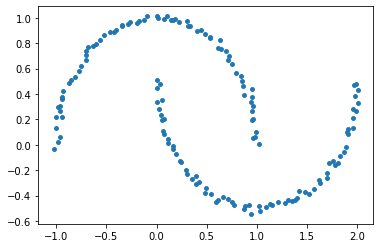

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

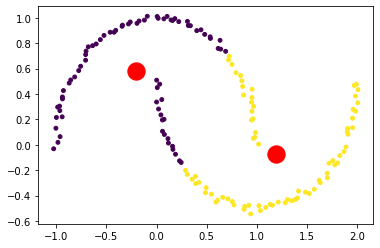

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], s=300, c='r', label='Centroids')
plt.show()

In [ ]:
#create eps and min_samples combination
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples = np.arange(5, 10)
dbscan_params = list(product(eps_values, min_samples) )

In [ ]:
#list contains looping result
no_of_clusters = []
epsvalues =  []
min_samp = []

#itarate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  #no of cluster must be > 1, so if cluster <= 1 then pass 
  if len(np.unique(dbscan_cluster.labels_)) <= 1  :
    pass
  else  :
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  #append values to list epsvalues . append (pc e ] ) min_samp. append (p [1] )
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
#create a dataframe based on the iteration results
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])
eps_min_df.head()

,no_of_clusters,epsilon_values,minimum_points
0,15,0.1,5
1,10,0.1,6
2,3,0.1,7
3,2,0.1,8
4,2,0.1,9


In [ ]:
"""
karena tujuannya menghasilkan cluster 4 
maka dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min _pts
"""
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
3,2,0.1,8
4,2,0.1,9
5,2,0.2,5
8,2,0.2,8
9,2,0.2,9
10,2,0.3,5
11,2,0.3,6
12,2,0.3,7
13,2,0.3,8
14,2,0.3,9


In [ ]:
dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

In [ ]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=6)
dbscan_cluster.fit(X)
dbscan_result = dbscan_cluster.labels_

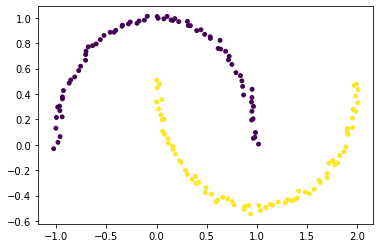

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=15, c=dbscan_result)
plt.show()

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  0.7779201103368357
DBI DBSCAN Score :  1.1680246072393763


In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score :', sil_kmeans)
print('Silhouette Score DBSCAN Score :', sil_dbscan)

Silhouette Score KMeans Score : 0.4881945681194248
Silhouette Score DBSCAN Score : 0.3234882498095671


In [ ]:
#sklearn.metrics.rand_score(labels_true, labels_pred)
from sklearn.metrics import rand_score

rand_score_Kmeans=rand_score(y, kmeans_result)
rand_score_dbscan=rand_score(y, dbscan_result)

print('Rand Score of KMeans : ' , rand_score_Kmeans)
print('Ransd Score of DBSCAN : ' , rand_score_dbscan)

Rand Score of KMeans :  0.6258612975391499
Ransd Score of DBSCAN :  1.0


In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_kmeans=calinski_harabasz_score(X, kmeans_result)
calinski_dbscan=calinski_harabasz_score(X, dbscan_result)

print('calinski score of KMeans : ', calinski_kmeans)
print('calinski Score of DBSCAN : ', calinski_dbscan)

calinski score of KMeans :  221.31923476761918
calinski Score of DBSCAN :  96.38984843538043


The higher the index, the higher the performance

#TUGAS

Lakukan clustering terhadap dataset "CC GENERAL.csv".

Gunakan fitur "PURCHASES" dan "CREDIT LIMIT" kemudian buat cluster menggunakan KMeans dan DBSCAN.

Dapat menggunakan elbow method, silhouette score, nearest neighbor, atau metode lainnya untuk menentukan nilai parameter untuk KMeans maupun DBSCAN

Evaluasi hasil clusternya menggunakan DBI dan Silhouette Score lalu berikan penjelasannya

Dataset dapat didownload pada : https://ungu.in/bddm-week13-dataset


#REFERENCES
*	https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
*	https://softscients.com/2020/05/21/buku-belajar-machine-learning-dengan-matlab-teknik-evaluasiclustering/#Cluster_evaluation_menggunakan_Silhouette
* https://spada.uns.ac.id/pJuginfile.pbp/648247/mod_resource/content/1/Ukuran%20Kinerja%20Klasifikasi.Qdf
* https://nopi-en.blogspot.com/2018/11/pengujian-silhouette-coefficient.html
* https://towardsdatascience.com/performance-metrics-in-machine-learning:part-3-clustering-d69550662dc6
* https://aclanthology.org/D07-1043.pdf


#Nama : Miftahudin Faiz
#NIM : 20.11.3675
#Kelas : 20-S1-IF-07

##1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
# from sklearn.metrics import rand_score
# from sklearn.metrics import homogeneity_score
# from sklearn.metrics import completeness_score
# from sklearn.metrics import v_measure_score

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

##2. Read Dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/miftahudinfaiz/BDDM/main/Dataset%20files/CC%20GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


##3. Data Preprocessing

In [ ]:
# Checking if any missing data
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# Dropping the missing data
df.dropna(inplace=True)

In [ ]:
# Checking if any missing data
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


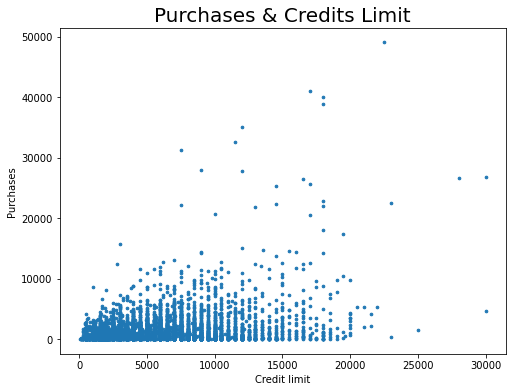

In [ ]:
# Plotting scatter data
plt.figure(figsize=(8,6))
plt.scatter(df['CREDIT_LIMIT'], df['PURCHASES'], s=7)

plt.title('Purchases & Credits Limit', fontsize =20)
plt.ylabel('Purchases')
plt.xlabel('Credit limit')

plt.show()

In [ ]:
df_sub = df[['CREDIT_LIMIT','PURCHASES']].copy()
df_sub.head()

,CREDIT_LIMIT,PURCHASES
0,1000.0,95.40
1,7000.0,0.00
2,7500.0,773.17
4,1200.0,16.00
5,1800.0,1333.28


In [ ]:
X = np.array(df_sub.iloc[:, [0,1]])

In [ ]:
X[:10]

array([[ 1000.  ,    95.4 ],
       [ 7000.  ,     0.  ],
       [ 7500.  ,   773.17],
       [ 1200.  ,    16.  ],
       [ 1800.  ,  1333.28],
       [13500.  ,  7091.01],
       [ 2300.  ,   436.2 ],
       [ 7000.  ,   861.49],
       [11000.  ,  1281.6 ],
       [ 1200.  ,   920.12]])

##4. KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


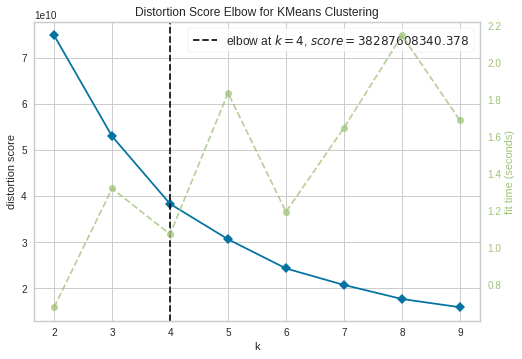

In [ ]:
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick  

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

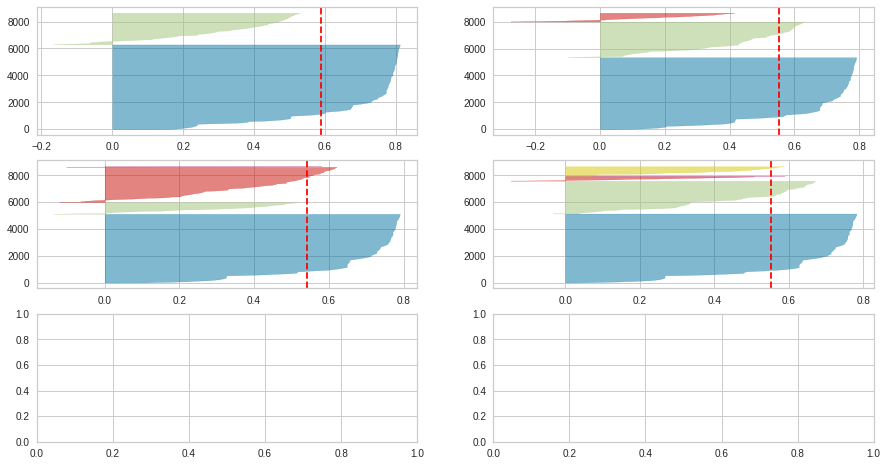

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 

Text(0, 0.5, 'wcss')

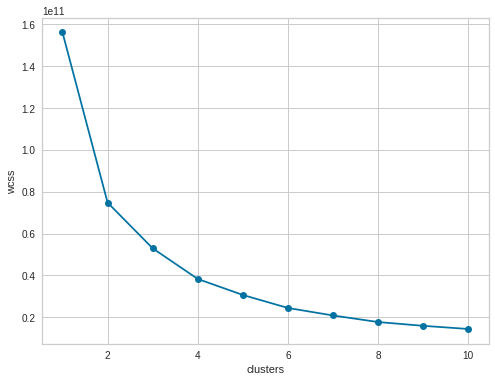

In [ ]:
# Using Elbow method to find optimal clusters
wcss= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,6))    
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel('clusters')
plt.ylabel('wcss')

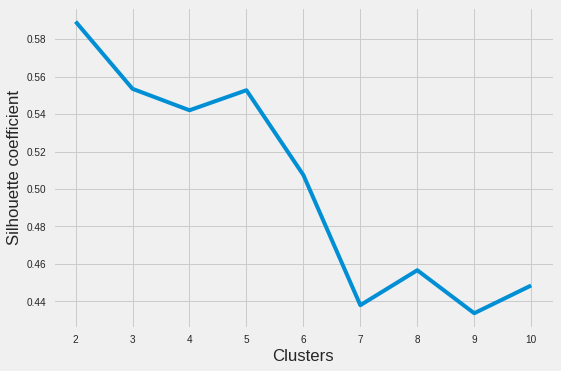

In [ ]:
silhouette_coefficients = []
for i in range (2,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  score = silhouette_score(X,kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

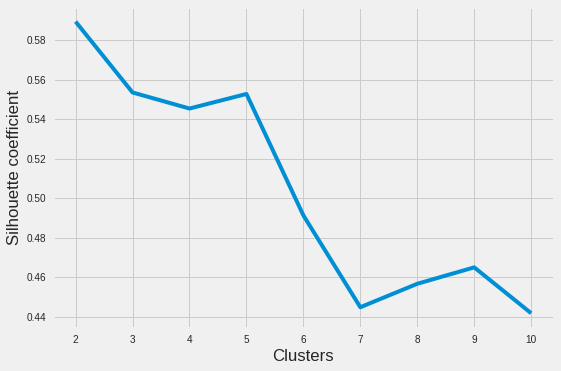

In [ ]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), sil)
plt.xticks(range(2,11))
plt.xlabel('Clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

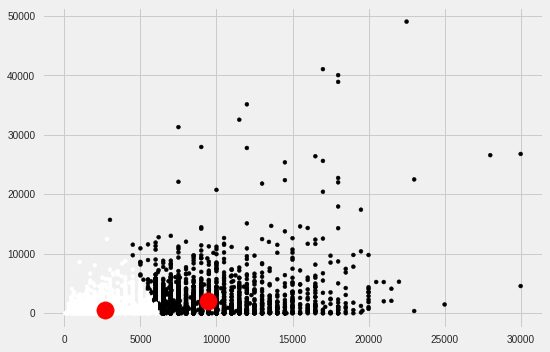

In [ ]:
kmeans_cluster= KMeans(n_clusters=2, init='k-means++', max_iter=300,
                       n_init=10, random_state=0)

kmeans_result= kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0],
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='red')
plt.show()

##5. DBSCAN Cluster

In [ ]:
# Using Nearest Neighbor to find most effective epsilon values
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

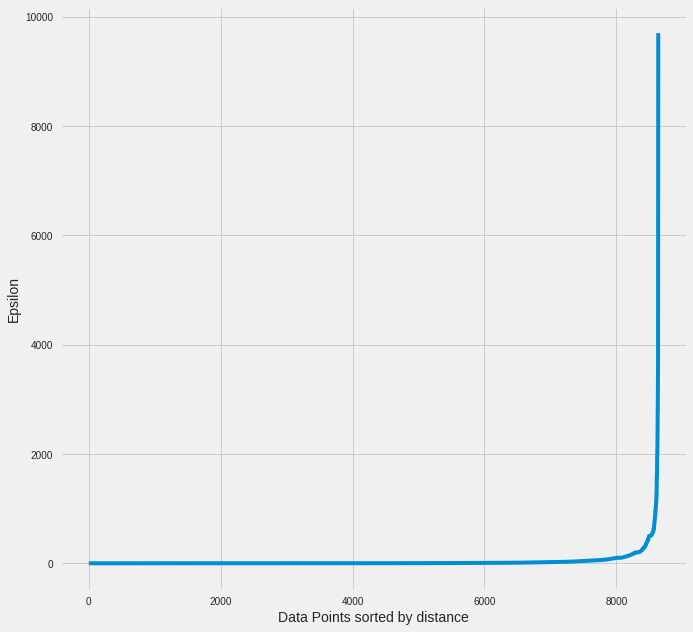

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

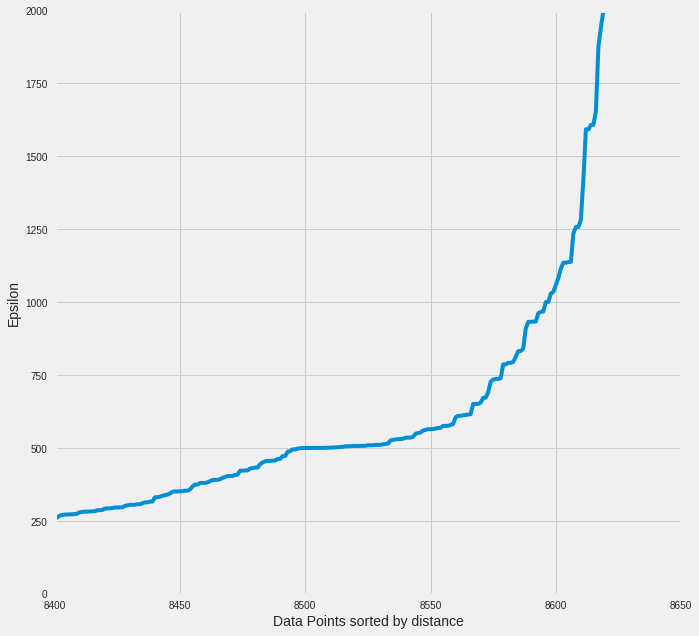

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([8400,8650])
plt.ylim([0,2000])
plt.show()

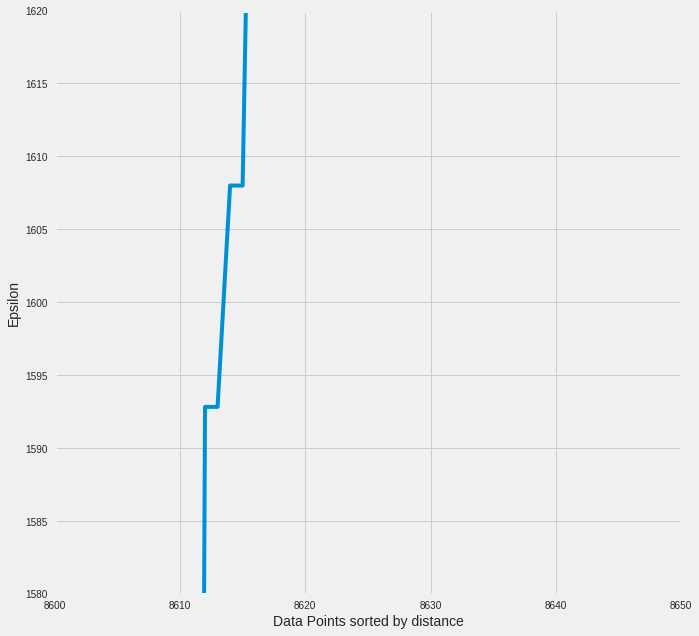

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.xlim([8600,8650])
plt.ylim([1580,1620])
plt.show()

In [ ]:
eps_values = np.arange(1550, 1650, 1)
min_samples = np.arange(3,5)
dbscan_params = list(product(eps_values,min_samples))

In [ ]:
# list contains looping res
no_of_clusters = []
epsvalues = []
min_samp = []

# iteration over combination
for p in dbscan_params:
  # create a dbscan cluster based on a combinatin of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

  if len(np.unique(dbscan_cluster.labels_)) <=1:
    pass
  else: 
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))

  # append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

In [ ]:
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])

eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,3,1550,3
1,2,1550,4
2,3,1551,3
3,2,1551,4
4,3,1552,3
...,...,...,...
195,2,1647,4
196,3,1648,3
197,2,1648,4
198,3,1649,3


In [ ]:
'''
karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari 
beberapa kombinasi parameter eps dan min_pts
'''
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
1,2,1550,4
3,2,1551,4
5,2,1552,4
7,2,1553,4
9,2,1554,4
...,...,...,...
191,2,1645,4
193,2,1646,4
195,2,1647,4
197,2,1648,4


####Create Cluster

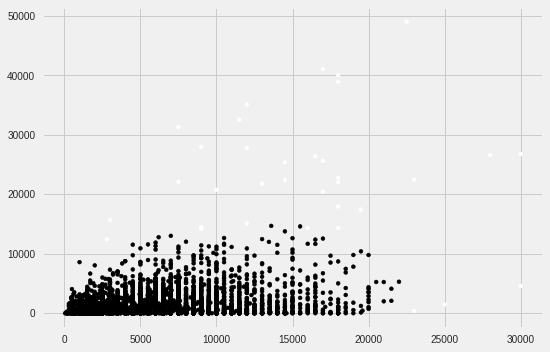

In [ ]:
dbscan_cluster=DBSCAN(eps=1580, min_samples=4)
dbscan_cluster.fit(X)

dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

##5. Cluster Evaluation

###Davies Bouldin Index DBI

In [ ]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI Kmeans Score: ', dbi_kmeans)
print('DBI DBSCAN Score: ', dbi_dbscan)

DBI Kmeans Score:  0.7316611581318277
DBI DBSCAN Score:  0.5595384449274067


####Berdasarkan nilai DBI *(makin kecil makin bagus)* **maka DBSCAN lebih unggul** karena DBI DBSCAN (0.559) < DBI Kmeans (0.731)

###Silhouette score

In [ ]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score Kmeans score: ', sil_kmeans)
print('Silhouette Score DBSCAN score: ', sil_dbscan)

Silhouette Score Kmeans score:  0.5893940857992109
Silhouette Score DBSCAN score:  0.8296929734396429


####Berdasarkan Silhouette Score *(makin mendekati 1 makin bagus)* **maka DBSCAN lebih unggul** karena Silhouette Score DBSCAN (0.82) > Silhouette Score KMeans (0.58)

###Jadi berdasarkan dua nilai tersebut, maka DBSCAN lebih unggul daripada KMeans untuk kasus ini